# Adding GSA to the running Freyberg pilot points notebook

## Taking the Freyberg with pilot points run and doing local and global sensitivity analysis like the freyberg_global_sensitivity notebook used on the zone model...

### This too should be super easy...

In [1]:
%matplotlib inline
import os, shutil
import sys
sys.path.append("..")
import numpy as np
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

import flopy as flopy
import pyemu

In [2]:
import freyberg_setup as fs
fs.setup_pest_pp()
working_dir = fs.WORKING_DIR_PP
pst_name = fs.PST_NAME_PP

['botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'obs_loc.csv', 'potobs_group.csv', 'Process_output.py', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_pp
FloPy is using the following executable to run the model: /Users/rjhunt1/GW1876-2/activities/freyberg_pilot_points_1/freyberg_pp/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULA

## The block above  made a version like the freyberg_pilot_points_run notebook


### Look at the parameters that we'll be evaluating

In [5]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.write(os.path.join(working_dir,pst_name))
pst.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
parnme,,,,,,,,,,
rch_0,rch_0,log,factor,1.0,0.5,2.0,rch,1.0,0.0,1
rch_1,rch_1,log,factor,1.0,0.5,2.0,rch,1.0,0.0,1
hk00,hk00,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1
hk01,hk01,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1
hk02,hk02,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1
hk03,hk03,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1
hk04,hk04,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1
hk05,hk05,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1
hk06,hk06,log,factor,5.0,0.5,50.0,hk,1.0,0.0,1


### Use the code blocks from the freyberg_global_sensitivity notebook to do the same local and global sensitivity calculations 

(Suggest using pestpp-swp even for the local sensitivity because pilot points added a gaggle of additional parameters)

### Set NOPTMAX=-2 to get Jacobian, run pestpp-swp to parallelize the run

In [17]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.control_data.noptmax = -2
pst.write(os.path.join(working_dir,pst_name))
os.chdir(working_dir)
pyemu.helpers.start_slaves('.',"pestpp",pst_name,num_slaves=15,master_dir='.')
os.chdir('..')

master:./pestpp freyberg_pp.pst /h :4004 in .
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_0
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_1
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_2
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_3
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_4
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_5
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_6
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_7
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_8
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_9
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_10
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_11
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_12
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_13
slave:./pestpp freyberg_pp.pst /h localhost:4004 in ../slave_14


### Evaluate the local sensitivity as in freyberg_global_sensitivity

In [18]:
jco = pyemu.Jco.from_binary(os.path.join(working_dir,pst_name.replace(".pst",".jcb")))
jco_df = jco.to_dataframe()

jco_df = jco_df.loc[pst.nnz_obs_names,:]
jco_df

,rch_0,rch_1,hk00,hk01,hk02,hk03,hk04,hk05,hk06,hk07,...,w0_r20_c14,w0_r26_c10,w0_r29_c06,w0_r34_c12,w1_r09_c16,w1_r11_c13,w1_r20_c14,w1_r26_c10,w1_r29_c06,w1_r34_c12
flx_river_l_19700102,-12744.213423,0.0,0.225984,-2.372835,-4.011221,-3.163780,-0.282480,-2.824803,-11.920670,-10.169292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cr03c10_19700102,12.077359,0.0,0.042372,0.331473,-0.436079,-2.094327,-0.257322,0.080772,0.207005,-1.419905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cr03c16_19700102,1.401809,0.0,0.001766,0.000883,0.010593,-0.099309,-0.163309,-0.000883,0.000000,0.007503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cr04c09_19700102,13.683965,0.0,0.045462,0.222895,-0.961757,-1.691792,-0.177874,0.099309,0.304549,-2.212174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cr10c02_19700102,22.782922,0.0,0.025600,-0.513761,-0.857151,-0.645291,-0.058262,-0.603802,-2.537027,-2.168919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cr14c11_19700102,6.176168,0.0,-0.003972,-0.024276,-0.104606,-0.177874,-0.025600,0.008386,0.075475,-0.022510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cr16c17_19700102,2.380780,0.0,0.000000,0.000000,0.000000,-0.003972,0.001324,0.000441,0.000441,0.001324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cr22c11_19700102,8.029945,0.0,0.000883,-0.022510,-0.045462,-0.045462,-0.005297,-0.022952,-0.092689,-0.088275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cr23c16_19700102,1.430939,0.0,0.000000,-0.000221,-0.000221,-0.000662,0.000000,-0.000221,-0.000441,-0.000441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cr25c05_19700102,18.254409,0.0,0.007062,-0.100634,-0.171695,-0.132854,-0.012359,-0.120937,-0.512878,-0.436079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sc = pyemu.Schur(jco=os.path.join(working_dir,pst_name.replace(".pst",".jcb")))
css_df = sc.get_par_css_dataframe()
css_df

,pest_css,hill_css
rch_0,47.869701,0.000000
rch_1,0.000000,0.000000
hk00,0.024265,0.001211
hk01,0.236978,0.011831
hk02,0.493433,0.024635
hk03,0.993356,0.049595
hk04,0.128197,0.006400
hk05,0.227033,0.011335
hk06,0.944355,0.047148
hk07,1.232848,0.061552


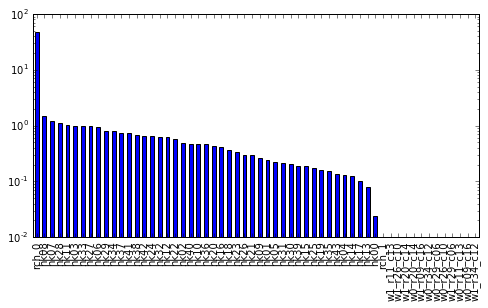

In [20]:
plt.figure(figsize=(8,4))
ax = css_df['pest_css'].sort_values(ascending=False).plot(kind='bar')
ax.set_yscale('log')

In [12]:
jco_fore_df = sc.forecasts.to_dataframe()
jco_fore_df

,fr03c10_19750101,fr03c16_19750101,fr04c09_19750101,fr10c02_19750101,fr14c11_19750101,fr16c17_19750101,fr22c11_19750101,fr23c16_19750101,fr25c05_19750101,fr27c07_19750101,fr30c16_19750101,fr34c08_19750101,fr35c11_19750101,flx_river_l_19750102,travel_time
rch_0,10.268602,0.742835,11.777223,20.610030,4.610167,1.319713,6.396856,0.765124,16.155227,13.522422,0.794476,9.368196,5.864557,2.005610,-16.198552
rch_1,1.184652,0.426369,1.250858,1.416815,1.026639,0.691635,1.075632,0.431665,1.374885,1.351492,0.440934,1.236734,1.046281,0.762697,-13.884474
hk00,0.041931,0.001324,0.045020,0.026041,-0.003972,0.000441,0.001324,0.000000,0.007503,0.004414,0.000000,0.002207,0.001103,0.112992,-34.711184
hk01,0.327059,0.000441,0.219364,-0.512878,-0.024276,0.000441,-0.022069,0.000000,-0.100192,-0.063117,0.000000,-0.028248,-0.015669,-1.412402,252.234603
hk02,-0.433431,0.008828,-0.956461,-0.854944,-0.104606,0.000000,-0.045020,-0.000221,-0.171695,-0.108578,-0.000221,-0.048551,-0.026924,-2.372835,418.848286
hk03,-2.054603,-0.070179,-1.670165,-0.643967,-0.177433,-0.003972,-0.045462,-0.000441,-0.132854,-0.085185,-0.000221,-0.037958,-0.020965,-1.666634,280.003550
hk04,-0.250701,-0.137268,-0.174785,-0.057820,-0.026041,0.000883,-0.004855,0.000221,-0.011917,-0.008386,0.000000,-0.003531,-0.001986,-0.112992,23.140789
hk05,0.080330,-0.000883,0.098868,-0.602036,0.007945,0.000441,-0.022510,0.000000,-0.120496,-0.075034,0.000000,-0.033986,-0.018538,-1.666634,307.772497
hk06,0.202591,0.000000,0.298370,-2.532613,0.074592,0.000441,-0.092247,-0.000441,-0.512878,-0.318673,-0.000441,-0.143888,-0.079006,-7.287993,1286.627883
hk07,-1.416815,0.006179,-2.202464,-2.164506,-0.022510,0.001324,-0.088275,-0.000221,-0.436079,-0.271887,-0.000441,-0.122702,-0.067310,-6.214567,1099.187490


### Use pestpp-swp to run Global Sensitivity Analysis (GSA) instead of PEST++

In [13]:
os.chdir(working_dir)
pyemu.helpers.start_slaves('.',"gsa",pst_name,num_slaves=15,master_dir=".")
os.chdir("..")

master:./gsa freyberg_pp.pst /h :4004 in .
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_0
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_1
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_2
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_3
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_4
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_5
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_6
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_7
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_8
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_9
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_10
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_11
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_12
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_13
slave:./gsa freyberg_pp.pst /h localhost:4004 in ../slave_14


### Evaluate GSA results for Pilot Point version

In [15]:
df = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".msn")),skipinitialspace=True)
df.loc[:,"parnme"] = df.pop("parameter_name").apply(lambda x : x.lower().replace("log(",'').replace(')',''))
df.index = df.parnme
df

,n_samples,sen_mean,sen_mean_abs,sen_std_dev,parnme
parnme,,,,,
rch_0,4,-3.673130e+04,5.996460e+04,1.044690e+05,rch_0
rch_1,4,-3.069550e-12,3.069550e-12,5.268990e-12,rch_1
hk00,4,2.957320e+01,5.389620e+01,8.922380e+01,hk00
hk01,4,-8.366750e+01,1.915180e+02,2.685740e+02,hk01
hk02,4,-1.894770e+02,3.409300e+02,3.845940e+02,hk02
hk03,4,-8.497310e+02,1.085790e+03,2.018370e+03,hk03
hk04,4,-1.782080e+02,2.118210e+02,3.531760e+02,hk04
hk05,4,1.211120e+01,1.080560e+02,1.651650e+02,hk05
hk06,4,-3.751170e+00,5.828730e+02,8.421270e+02,hk06


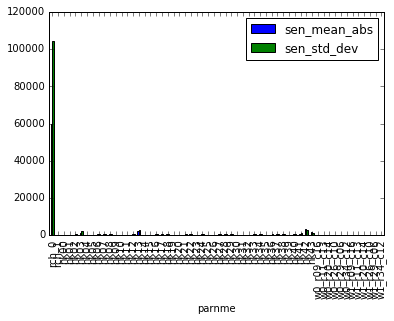

In [16]:
df.loc[:,["sen_mean_abs","sen_std_dev"]].plot(kind="bar")